# 1. Preparing dataset to get the data that is required to feed our model

## Looking for missing, null, NaN records.Additionally, finding the outliers for the dataset of March.

In [7]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

df = pd.read_parquet('yellow_tripdata_2020-03.parquet')

missing_values = df.isnull().sum()
print("Missing Values found from the Dataset proivded is:")
print(missing_values)

# Detecting Outliers of the Dataset
numeric_cols = df.select_dtypes(include=['number']).columns
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print("Outliers of the Given Dataset is:")
print(outliers)

# Transforming the values of the Dataset to Numeric Format
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

print("Dataset after the Transformation:")
print(df.head())


Missing Values found from the Dataset proivded is:
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007687
dtype: int64
Outliers of the Given Dataset is:
{'VendorID': 485, 'passenger_count': 782468, 'trip_distance': 326418, 'RatecodeID': 83032, 'PULocationID': 0, 'DOLocationID': 0, 'payment_type': 9662, 'fare_amount': 274804, 'extra': 3106, 'mta_tax': 38606, 'tip_amount': 117199, 'tolls_amount': 137134, 'improvement_surcharge

In [9]:
import pandas as pd

df2 = pd.read_parquet('yellow_tripdata_2020-05.parquet')

missing_values = df2.isnull().sum()
print("Missing Values:")
print(missing_values)

# Detecting Outliers of the Dataset
numeric_cols_2 = df2.select_dtypes(include=['number']).columns
outliers_2 = {}
for col in numeric_cols_2:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_2 = Q1 - 1.5 * IQR
    upper_bound_2 = Q3 + 1.5 * IQR
    outliers[col] = df2[(df2[col] < lower_bound_2) | (df2[col] > upper_bound_2)].shape[0]

print("\nOutliers:")
print(outliers_2)

# Transforming the values of the Dataset to Numeric Format
categorical_cols_2 = df2.select_dtypes(include=['object']).columns
for col in categorical_cols_2:
    df2[col] = pd.factorize(df2[col])[0]

print("\nTransformed Data:")
print(df2.head())


Missing Values:
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           58901
trip_distance                 0
RatecodeID                58901
store_and_fwd_flag        58901
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      58901
airport_fee              348415
dtype: int64

Outliers:
{}

Transformed Data:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-05-01 00:02:28   2020-05-01 00:18:07              1.0   
1         1  2020-05-01 00:23:21   2020-05-01 00:26:01              2.0   
2         1  2020-05-01 00:54:58   2020-05-01 00:57:11              1.0   
3         1  2020-05-01 00:07:

# 2. Listing the Datatypes of the data present in the Dataset

## Datatypes of the data present in March

In [10]:
import pandas as pd

df = pd.read_parquet('yellow_tripdata_2020-03.parquet')
data_types = df.dtypes

print(data_types)

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object


In [11]:
import pandas as pd

df2 = pd.read_parquet('yellow_tripdata_2020-05.parquet')
data_types_2 = df2.dtypes

print(data_types_2)

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object


# 3. Performing EDA on Data

## ▬ Classic approach in EDA

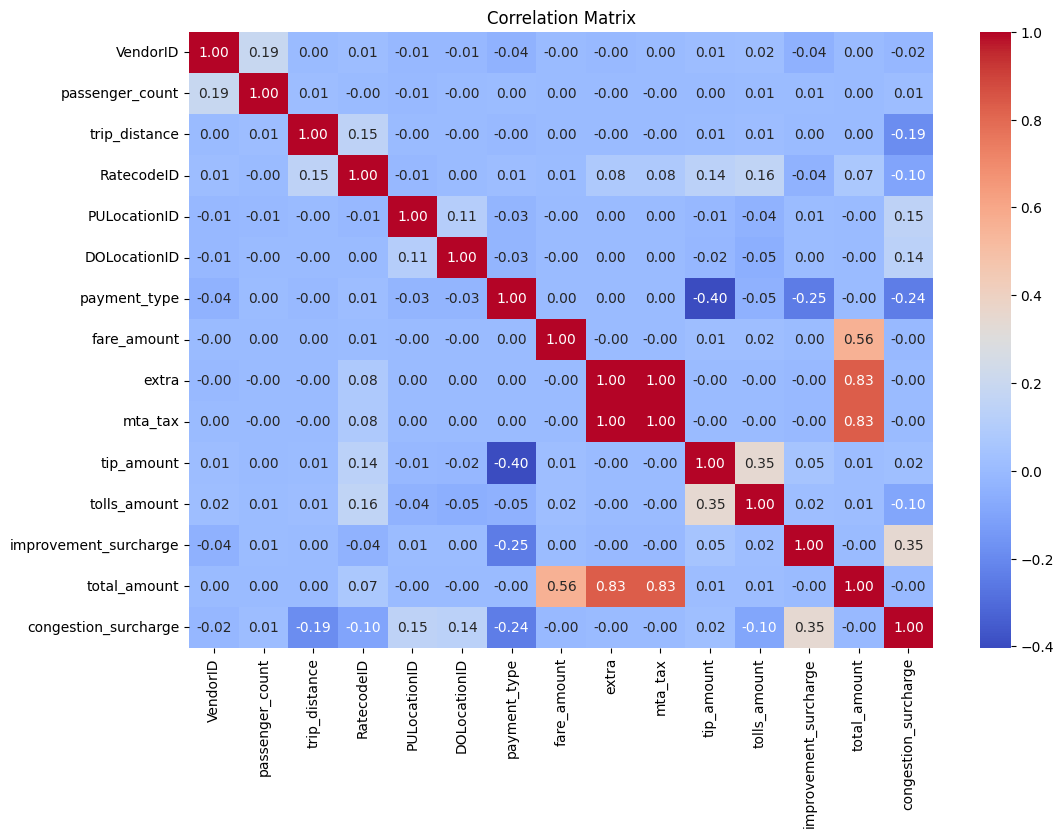

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('yellow_tripdata_2020-03.parquet')

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships between variables
plt.show()


In [4]:
import tensorflow_data_validation as tfdv

stats = tfdv.generate_statistics_from_dataframe(df)

tfdv.visualize_statistics(stats)

schema = tfdv.infer_schema(statistics=stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,optional,single,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,optional,single,-
'store_and_fwd_flag',STRING,optional,single,'store_and_fwd_flag'
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'store_and_fwd_flag',"'N', 'Y'"


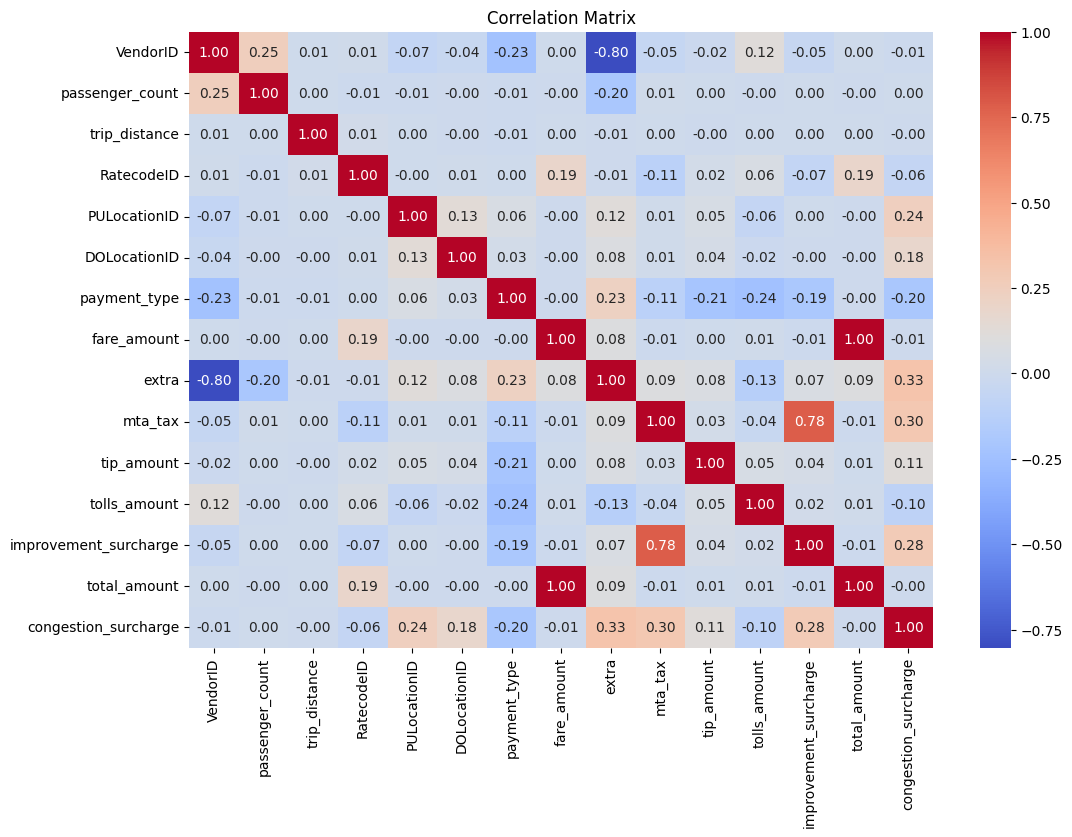

In [15]:
df2 = pd.read_parquet('yellow_tripdata_2020-05.parquet')

# Select only numeric columns
numeric_cols = df2.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships between variables
plt.show()

In [16]:
stats = tfdv.generate_statistics_from_dataframe(df2)

tfdv.visualize_statistics(stats)

schema = tfdv.infer_schema(statistics=stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,optional,single,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,optional,single,-
'store_and_fwd_flag',STRING,optional,single,'store_and_fwd_flag'
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'store_and_fwd_flag',"'N', 'Y'"


# 4. Dataset Information from March onwards

In [19]:

# Filtering dataset of March
df_march_2020_onwards = df[df['tpep_pickup_datetime'] >= '2020-03-01']

print("Information about the March's Dataset:")
print(df_march_2020_onwards.info())

print("Summary of March:")
print(df_march_2020_onwards.describe())

print("Filtered dataset: ")
print(df_march_2020_onwards.head())


Information about the March's Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3007298 entries, 0 to 3007686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   flo

# Extra Credit

## January 2020 data presents the ‘baseline’ of what the NYC Taxi business used to be.

In [20]:
import pandas as pd

df3 = pd.read_parquet('yellow_tripdata_2020-01.parquet')

# Filtering the Dataset of January
df_january_2020 = df3[df3['tpep_pickup_datetime'].dt.month == 1]

print("Information of the filtered Dataset of month January:")
print(df_january_2020.info())

print("Summary: ")
print(df_january_2020.describe())
df_january_2020.to_parquet('yellow_tripdata_2020-01_filtered.parquet')

print("Filtered dataset:")
print(df_january_2020.head())


Information of the filtered Dataset of month January:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6404819 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_

## Comparing the data of Jan-2020 vs Mar-2020.


 Total Trips:
In January: 6404819
In March: 3007261
In May: 348392

 Average Distance covered:
In January: 2.929636153652432
In March: 3.117107879894695
In May: 8.33345200234219

 Average Fare Amount:
In January : 12.694060138155356
In March : 12.69780977440934
In May : 14.942166209327429

 Average Customer That Used the Ride:
In January : 1.515318222071629
In March : 1.4674450142837756
In May : 1.314175570224981


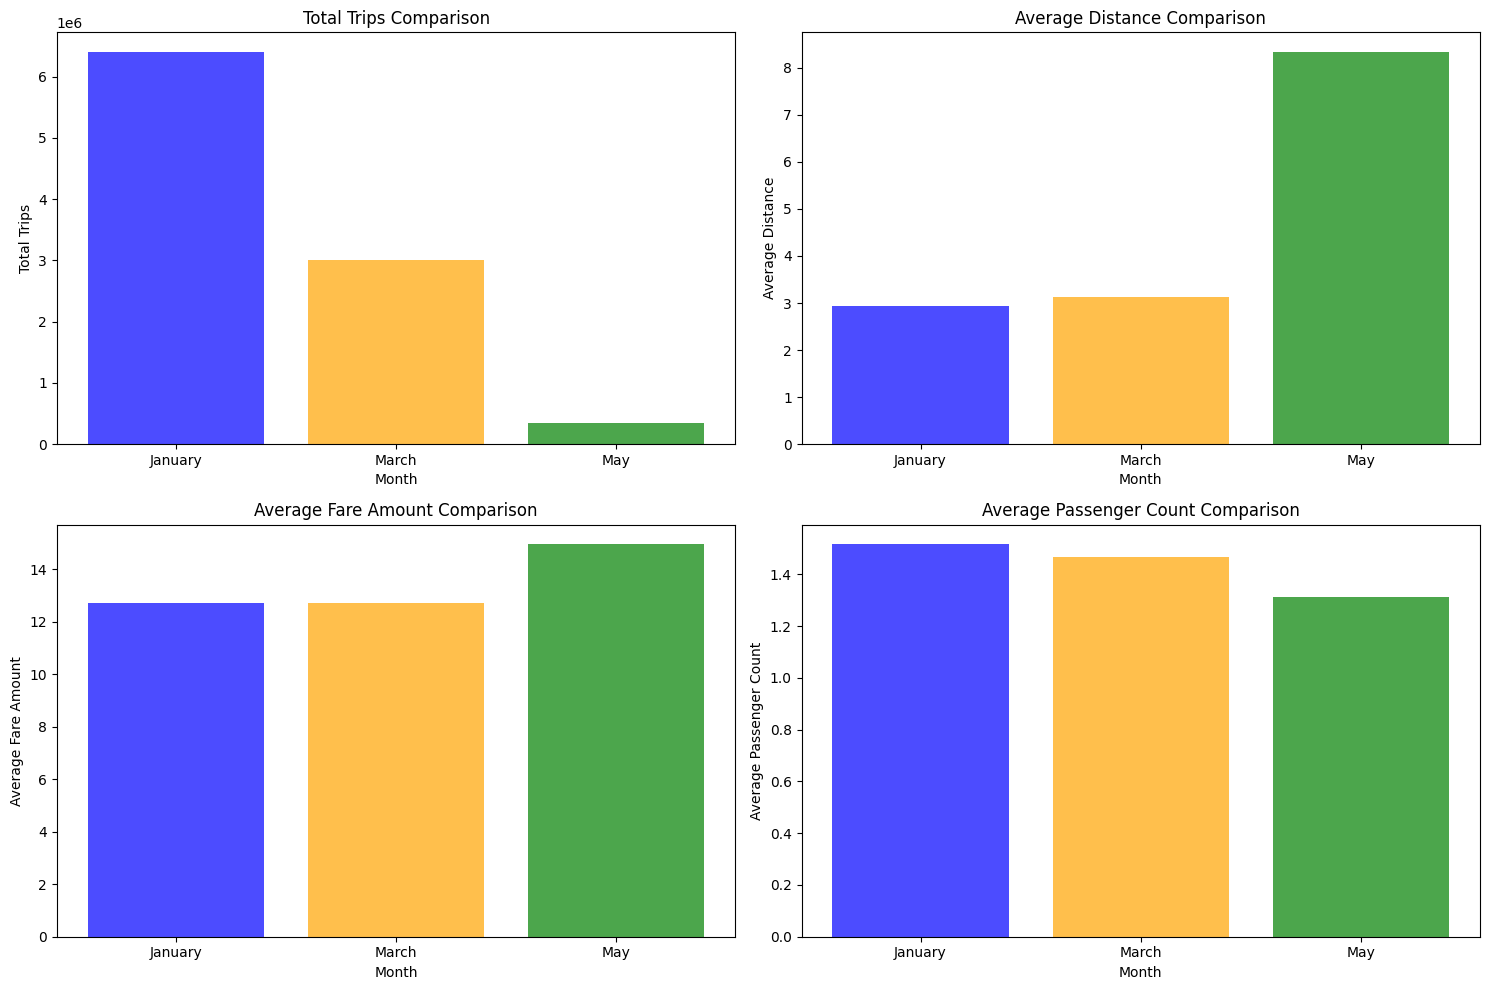

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets for January and March
df_january = pd.read_parquet('yellow_tripdata_2020-01.parquet')
df_march = pd.read_parquet('yellow_tripdata_2020-03.parquet')
df_may = pd.read_parquet('yellow_tripdata_2020-05.parquet')

# Filtering records for January and March
df_january = df_january[df_january['tpep_pickup_datetime'].dt.month == 1]
df_march = df_march[df_march['tpep_pickup_datetime'].dt.month == 3]
df_may = df_may[df_may['tpep_pickup_datetime'].dt.month == 5]

# To compare the total trips in January and March
jan_total_trips = len(df_january)
mar_total_trips = len(df_march)
may_total_trips = len(df_may)
print("\n Total Trips:")
print("In January:", jan_total_trips)
print("In March:", mar_total_trips)
print("In May:", may_total_trips)

# To compare average distance covered in January and March
jan_avg_distance = df_january['trip_distance'].mean()
mar_avg_distance = df_march['trip_distance'].mean()
may_avg_distance = df_may['trip_distance'].mean()
print("\n Average Distance covered:")
print("In January:", jan_avg_distance)
print("In March:", mar_avg_distance)
print("In May:", may_avg_distance)

# To compare average fare amount of January and March
jan_avg_fare = df_january['fare_amount'].mean()
mar_avg_fare = df_march['fare_amount'].mean()
may_avg_fare = df_may['fare_amount'].mean()
print("\n Average Fare Amount:")
print("In January :", jan_avg_fare)
print("In March :", mar_avg_fare)
print("In May :", may_avg_fare)

# To compare average customer that used rides in January and March
jan_avg_passenger_count = df_january['passenger_count'].mean()
mar_avg_passenger_count = df_march['passenger_count'].mean()
may_avg_passenger_count = df_may['passenger_count'].mean()
print("\n Average Customer That Used the Ride:")
print("In January :", jan_avg_passenger_count)
print("In March :", mar_avg_passenger_count)
print("In May :", may_avg_passenger_count)

# Creating separate bar plots for each metric
metrics = ['Total Trips', 'Average Distance', 'Average Fare Amount', 'Average Passenger Count']
january_values = [jan_total_trips, jan_avg_distance, jan_avg_fare, jan_avg_passenger_count]
march_values = [mar_total_trips, mar_avg_distance, mar_avg_fare, mar_avg_passenger_count]
may_values = [may_total_trips, may_avg_distance, may_avg_fare, may_avg_passenger_count]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar('January', jan_total_trips, color='blue', alpha=0.7)
plt.bar('March', mar_total_trips, color='orange', alpha=0.7)
plt.bar('May', may_total_trips, color='green', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Trips Comparison')

plt.subplot(2, 2, 2)
plt.bar('January', jan_avg_distance, color='blue', alpha=0.7)
plt.bar('March', mar_avg_distance, color='orange', alpha=0.7)
plt.bar('May', may_avg_distance, color='green', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Distance')
plt.title('Average Distance Comparison')

plt.subplot(2, 2, 3)
plt.bar('January', jan_avg_fare, color='blue', alpha=0.7)
plt.bar('March', mar_avg_fare, color='orange', alpha=0.7)
plt.bar('May', may_avg_fare, color='green', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount Comparison')

plt.subplot(2, 2, 4)
plt.bar('January', jan_avg_passenger_count, color='blue', alpha=0.7)
plt.bar('March', mar_avg_passenger_count, color='orange', alpha=0.7)
plt.bar('May', may_avg_passenger_count, color='green', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count Comparison')

plt.tight_layout()
plt.show()
